In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score

In [2]:
data= pd.read_csv('../3_credit_qmvd_cmvd.csv')
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,>=1
1,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
2,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
3,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0
4,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,>=1


In [3]:
data.dtypes

Loan Status                   object
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems     object
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                  object
dtype: object

In [4]:
##copying data
data1=data.copy()

## dicision tree (ID3)


### spliting data en X et Y

In [5]:
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

### One hot encoding

In [6]:
X= pd.get_dummies(X, drop_first= True)
Y= pd.get_dummies(Y, drop_first= True)

### balancing the data again

In [7]:
tm =TomekLinks()
X , Y = tm.fit_resample(X, Y)

### spliting the data to train and test

In [8]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123, stratify=Y)

## dicision tree (CART)

In [9]:
dct = DecisionTreeClassifier()
params={'criterion' : ['gini', 'entropy'],
        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14, 15, 16, 17, None]}

##accuracy
grid_search_acc= GridSearchCV(estimator=dct, param_grid= params, scoring='accuracy',cv=15, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)


In [10]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'criterion': 'entropy', 'max_depth': 7}
----------
[[1010 2233]
 [ 160 8839]]
----------
              precision    recall  f1-score   support

           0       0.86      0.31      0.46      3243
           1       0.80      0.98      0.88      8999

    accuracy                           0.80     12242
   macro avg       0.83      0.65      0.67     12242
weighted avg       0.82      0.80      0.77     12242

----------


In [11]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=dct, param_grid= params, scoring=rec_avg,cv=15, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [12]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'criterion': 'entropy', 'max_depth': None}
----------
[[1619 1624]
 [1653 7346]]
----------
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      3243
           1       0.82      0.82      0.82      8999

    accuracy                           0.73     12242
   macro avg       0.66      0.66      0.66     12242
weighted avg       0.73      0.73      0.73     12242

----------


In [13]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=dct, param_grid= params, scoring=prec_avg,cv=15, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [14]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'criterion': 'gini', 'max_depth': 4}
----------
[[ 867 2376]
 [   0 8999]]
----------
              precision    recall  f1-score   support

           0       1.00      0.27      0.42      3243
           1       0.79      1.00      0.88      8999

    accuracy                           0.81     12242
   macro avg       0.90      0.63      0.65     12242
weighted avg       0.85      0.81      0.76     12242

----------


In [30]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.set_ylim([0.60,0.95])
        ax.plot(grid_param_1[:-1], scores_mean[idx,:-1], '-o', label= name_param_2 + ': ' + str(val))
        ax.plot(19, scores_mean[idx, -1:], 's', label= 'crt' + '=' + str(val) + ' & mx_dpt=None')
        
    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

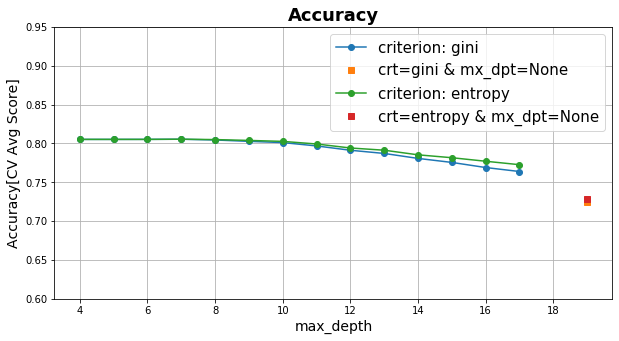

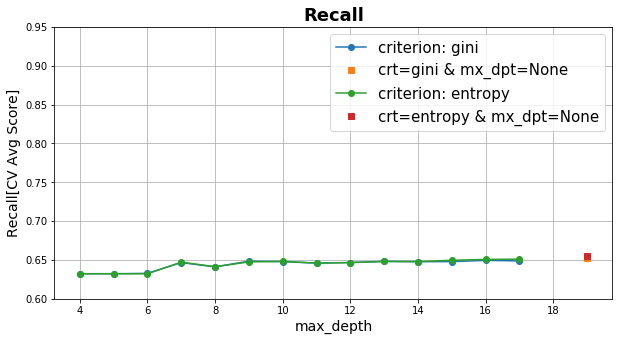

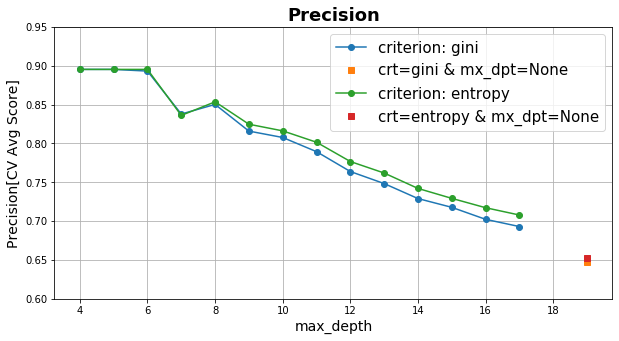

In [33]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['max_depth'], params['criterion'],  'max_depth', 'criterion', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['max_depth'], params['criterion'],  'max_depth', 'criterion', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['max_depth'], params['criterion'], 'max_depth', 'criterion', 'Precision')


In [34]:
from pprint import pprint
pprint(grid_search_acc.cv_results_['mean_test_score'])
print("-------")
pprint(grid_search_rec.cv_results_['mean_test_score'])
print("-------")
pprint(grid_search_prec_avg.cv_results_['mean_test_score'])
print("-------")
pprint(grid_search_prec_avg.cv_results_)

array([0.80508925, 0.80508925, 0.80513009, 0.80529347, 0.80433362,
       0.8025773 , 0.80098436, 0.79667524, 0.79109995, 0.78699506,
       0.78060287, 0.77543602, 0.76886003, 0.76373402, 0.72466609,
       0.80508925, 0.80508925, 0.80508925, 0.80533431, 0.80484418,
       0.80376179, 0.80253645, 0.79916677, 0.79402034, 0.79116121,
       0.78521831, 0.78150145, 0.77694727, 0.77251562, 0.72824   ])
array([0.63210174, 0.63210174, 0.63257365, 0.64649154, 0.6408346 ,
       0.64830806, 0.64761703, 0.64580995, 0.64655295, 0.64803949,
       0.64761582, 0.6476782 , 0.64928664, 0.6486016 , 0.65225709,
       0.63210174, 0.63210174, 0.63210174, 0.64698851, 0.6411962 ,
       0.64728244, 0.64808877, 0.64572684, 0.64640238, 0.64785492,
       0.64773028, 0.6494495 , 0.65050053, 0.65088285, 0.65475293])
array([0.89522155, 0.89522155, 0.89304072, 0.83772914, 0.85013523,
       0.81577145, 0.80754435, 0.78927766, 0.76370109, 0.74819133,
       0.72888852, 0.71758433, 0.70213364, 0.69283841, 0.647